# Week3授業課題　信用情報の分析

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
credit_data = pd.read_csv("application_train.csv")
credit_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 【問題1】コンペティション内容の把握

・Home Creditはどのような企業？

・消費者金融から支店対応貸付まで金融事業を展開。<br>
・9か国（中国、ロシア、カザフスタン、インド、インドネシア、ベトナム、フィリピン、チェコ共和国とスロバキア）において、利便性が低く手頃なPOS（Point of Sales）ローン、現金ローン、およびリボルビングローン商品を、資金不足の借り手に提供しています。<br>
・22年の実績がある<br>

http://www.homecredit.net/

・このコンペティションでは何を予測する？

目的：顧客の返済能力を予測すること。<br>
提出物：提出物は、予測確率と観察された目標との間のＲＯＣ曲線下面積で評価される。
https://oku.edu.mie-u.ac.jp/~okumura/stat/ROC.html<br>

・それを予測することで企業が得られるメリットは何？

より高い精度で返済能力の確かな顧客に融資することができる。また、返済能力があるのにないと判断するような、ビジネスチャンスの損失を防ぐ。

### 【問題2】データの概観の把握

・.head()、.info()、describe()などを使う

In [75]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


説明・考察：サンプル総数は307511。特徴量は 122。
データタイプはfloat64(65), int64(41), object(16)であった。

In [76]:
credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


・欠損値の有無を見る

In [77]:
nan_credit_data_sum = credit_data.isnull().sum() # 列ごとの欠損値の合計(全ての列)
nan_credit_data_sum = pd.DataFrame(nan_credit_data_sum)

nan_credit_data_sum.columns = ["nan"] #column名を指定
nan_credit_data_sum.head()

,nan
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0


In [101]:
#欠損値の数（欠損値ありのみ）
nan_credit_data = nan_credit_data_sum[nan_credit_data_sum["nan"] != 0]
nan_credit_data


,nan
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
NAME_TYPE_SUITE,1292
OWN_CAR_AGE,202929
OCCUPATION_TYPE,96391
CNT_FAM_MEMBERS,2
EXT_SOURCE_1,173378
EXT_SOURCE_2,660
EXT_SOURCE_3,60965
APARTMENTS_AVG,156061


説明・考察：欠損値がある特徴量は６７。サンプル総数307511に対し、最大で41519の欠損値があった。

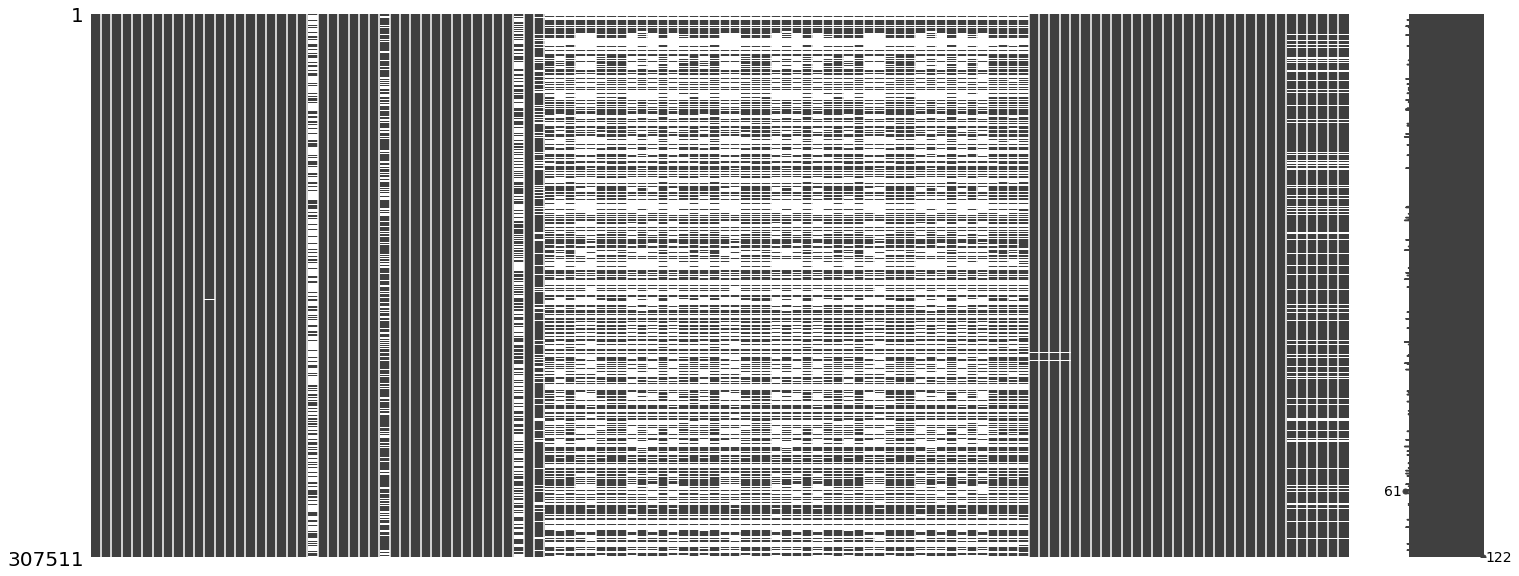

In [79]:
# 欠損値を可視化する
msno.matrix(credit_data)

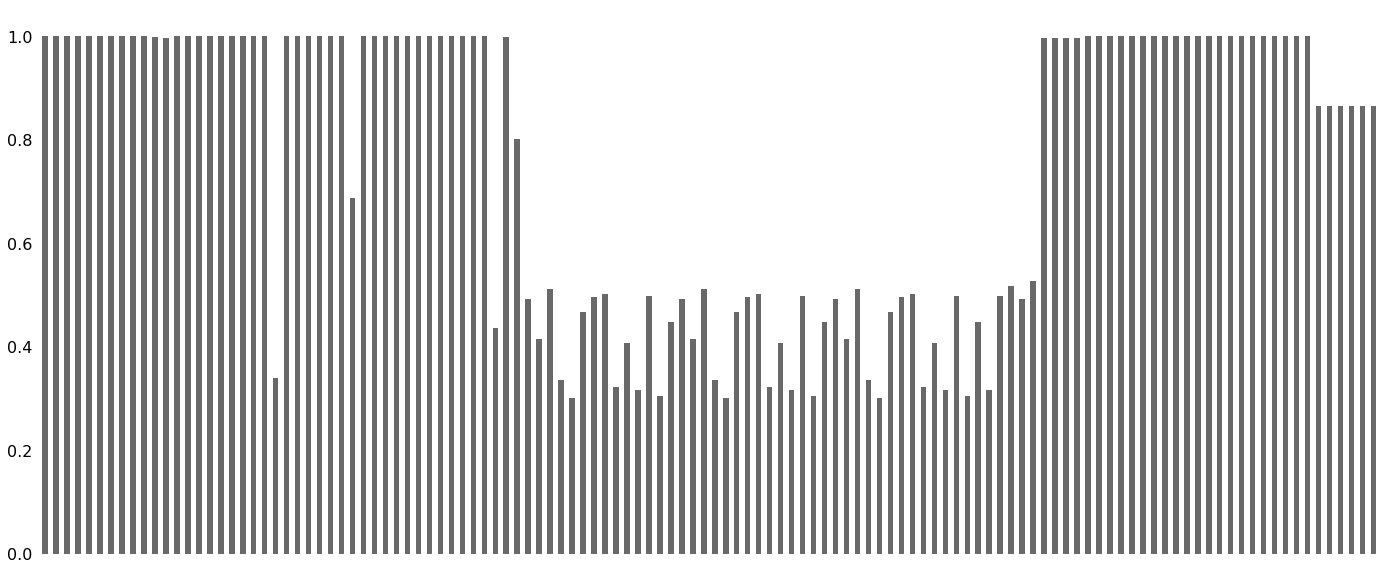

In [80]:
# 特徴量ごとの欠損していない割合を見る
msno.bar(credit_data)

・クラスごとのデータ数をグラフに出す

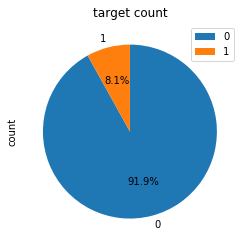

In [81]:
target_count = credit_data["TARGET"].value_counts()
target_count = pd.DataFrame(target_count)
target_count.columns = ["count"] # column名を指定
target_count
target_count.plot(kind='pie', y=target_count.columns[0],
                 counterclock=False, startangle=90, title = "target count",
                  autopct="%1.1f%%")


説明・考察：目的変数１：支払いが困難な顧客（過去、支払いの遅れがあった）の割合は、全サンプル中、約7.7％であった。(全データの場合は８.１％）

### 【問題3】課題設定

### 仮説
仮説１：収入の多い人は、返済能力が高いのではないか？<br>
仮説２：返済が困難な人は、借金の有無や金額が多くなるのではないか？<br>
仮説３：収入に対する借金の比率は、返済能力によって異なるのではないか？<br>
仮説４：携帯電話の有無は、返済能力の有無を判断できるのでは？<br>
仮説５：子供の人数が返済能力に影響するのではないか？<br>
仮説６：支払い困難者が居住するエリアは評価の低いエリアに集中するのでは？<br>
仮説７：職種を答えていない人（欠損）は、返済能力が低いのではないか？<br>



### 【問題4】データ探索

In [82]:
# 欠損値の処理：サンプルが多いので、欠損値50以上の特徴量は削除

many_nan = nan_credit_data_sum[nan_credit_data_sum["nan"]>=50] # 5つ以上欠損値がある列
print("欠損値が５０以上のカラム数は{}".format(many_nan.shape[0]))
#display(many_nan.shape)
many_nan_columns = many_nan.index #列名リストを取得
#many_nan_columns # 列名リストを確認

credit_data2 = credit_data.drop(many_nan_columns, axis=1) # 列リストで指定した列を削除
print("欠損値５０以上を削除した後のshapeは{}".format(credit_data2.shape))

欠損値が５０以上のカラム数は64
欠損値５０以上を削除した後のshapeは(307511, 58)


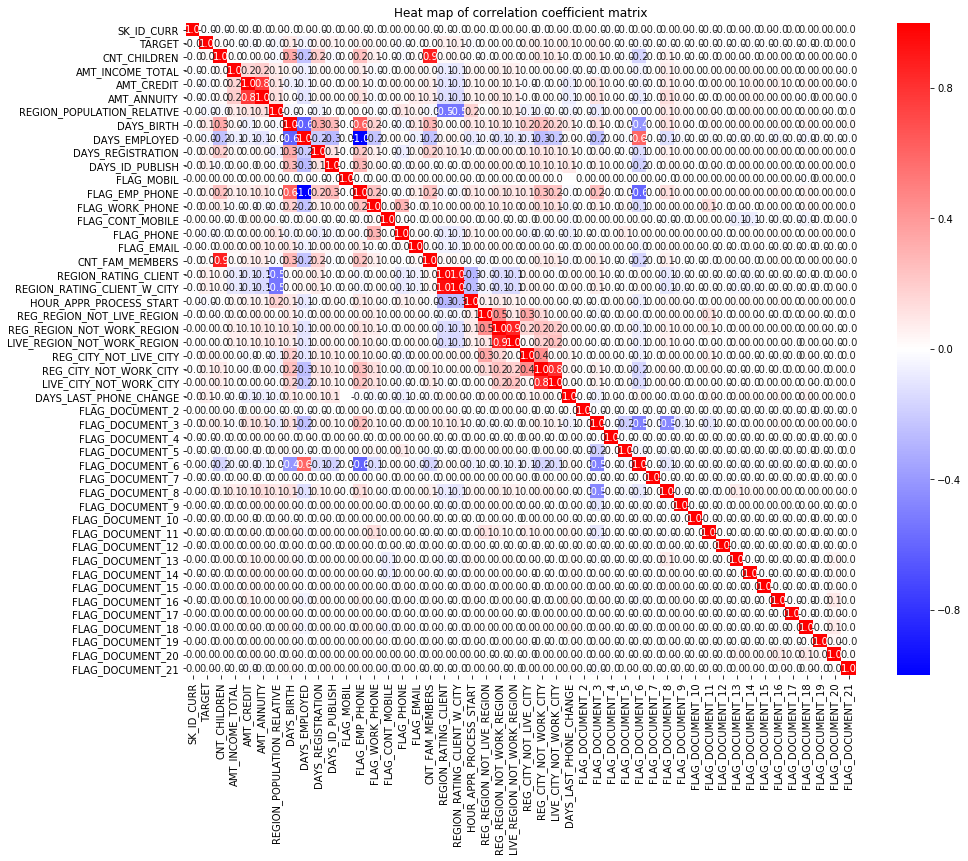

In [83]:
# まずは各特徴量と目的変数の相関を調べる。
# 相関係数の高い特徴量があるか確認する。

corr_matrix = credit_data2.corr() # 相関係数行列
#print(corr_matrix)

colormap = plt.cm.bwr
plt.subplots(figsize=(15, 12))
plt.title('Heat map of correlation coefficient matrix')
sns.heatmap(corr_matrix,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に各要素の値を表示
            fmt='.1f',
            xticklabels = 1, # x軸
            yticklabels = 1, # y軸
            cmap= colormap
           )
plt.show()

In [84]:
# 特徴量が多く相関が見づらいので、TARGETとの相関をソート(上位２０)

corr_sorted  = corr_matrix["TARGET"].sort_values(ascending=False)
print(corr_sorted[1:20])


DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
FLAG_WORK_PHONE                0.028524
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819
Name: TARGET, dtype: float64


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2
1,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1
2,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2
3,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2
4,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2


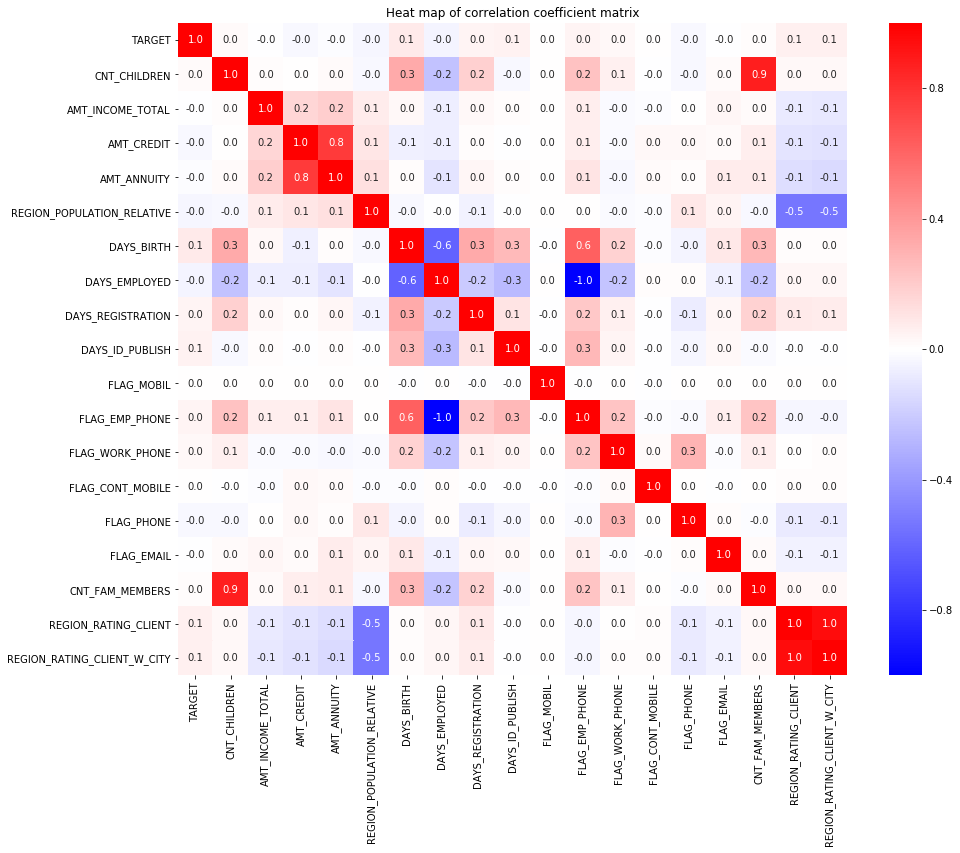

In [85]:
# ヒートマップ描画を関数に

def plot_heatmap(data, a, colormap=plt.cm.bwr):
    corr_matrix = data.corr() # 相関係数行列
    corr_sorted = data[corr_matrix[1:a].index] # 相関係数でソート
    display(corr_sorted.head())
    corr_matrix_sprted = corr_sorted.corr() # ソート後の相関係数行列

    plt.subplots(figsize=(15, 12))
    plt.title('Heat map of correlation coefficient matrix')
    sns.heatmap(corr_matrix_sprted,
                vmin=-1.0,
                vmax=1.0,
                center=0,
                annot=True, # True:格子の中に各要素の値を表示
                fmt='.1f',
                xticklabels = 1, # x軸
                yticklabels = 1, # y軸
                cmap= colormap
               )
    plt.show()
    
# TARGETとの相関上位２０のヒートマップを描画
plot_heatmap(data=credit_data2, a=20)

説明・考察：<br>
目的変数との相関はどれも値が小さく、差異が見られなかった。<br>
＜特徴量同士で相関が高いもの＞<br>
[年金と支払い金額]、[家族人数と子供の数]、[顧客の居住エリアの評価値と都市を考慮した顧客の居住エリアの評価値]、[生年月日と仕事用電話の所持]<br>
＜逆相関が高いもの＞<br>
[雇用された日と仕事用電話の所持]、[雇用された日と生年月日][顧客の居住地の人口と顧客の居住エリアの評価]<br>
相関が高いものは、データの質自体が近しく、逆相関が高いものも、データの質が真逆なので、着目すべき点はないように思われる。

### 仮説1：収入の多い人は、返済能力が高いのではないか？

### 検証1：ヒストグラムで、TARGET１（支払いが困難な顧客）とTARGET０（困難でない顧客）の収入の分布を比較する

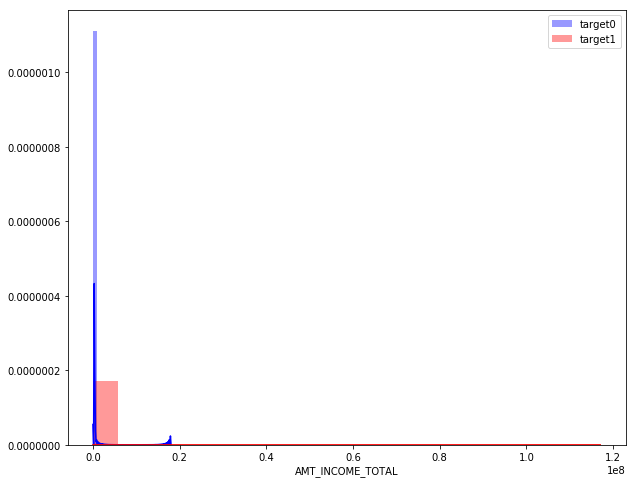

In [86]:
# ターゲット０と１の収入ヒストグラムを描画(関数にする)
def plot_hist(data, target_column):
    # ターゲット０と１でデータを分ける
    t0 = data.query("TARGET == 0")
    t1 = data.query("TARGET == 1")
    
    # それぞれの収入データを得る
    target0 = t0[target_column]
    target1 = t1[target_column]
    
    #描画する
    plt.figure(figsize=(10, 8))
    display(sns.distplot(target0,
                         kde=True, rug=False, bins=20, color="blue",
                        label="target0"))
    display(sns.distplot(target1,
                         kde=True, rug=False, bins=20, color="red",
                        label="target1"))

    plt.legend(loc="best")
    plt.show()
    
plot_hist(data=credit_data2, target_column="AMT_INCOME_TOTAL")


In [87]:
# グラフが偏っているので、対数変換する

# ターゲット０と１でデータを分ける
t0 = credit_data2.query("TARGET == 0")
t1 = credit_data2.query("TARGET == 1")
#t1.head()

# それぞれの収入データを得る
target0 = t0["AMT_INCOME_TOTAL"]
target1 = t1["AMT_INCOME_TOTAL"]

# 対数変換する
target0_log = target0.apply(np.log)
target1_log = target1.apply(np.log)

print("対数変換前の収入データ")
display(target0.head())

print("対数変換後の収入データ")
display(target0_log.head())

対数変換前の収入データ


1    270000.0
2     67500.0
3    135000.0
4    121500.0
5     99000.0
Name: AMT_INCOME_TOTAL, dtype: float64

対数変換後の収入データ


1    12.506177
2    11.119883
3    11.813030
4    11.707670
5    11.502875
Name: AMT_INCOME_TOTAL, dtype: float64

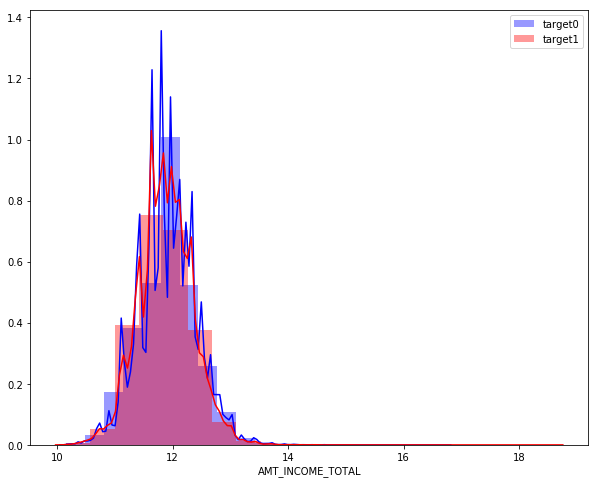

In [88]:
# ターゲット０と１の対数変換した収入ヒストグラムを描画(関数にする)
def plot_hist_log(data, target_column):
    # ターゲット０と１でデータを分ける
    t0 = data.query("TARGET == 0")
    t1 = data.query("TARGET == 1")
    
    # それぞれの収入データを得る
    target0 = t0[target_column]
    target1 = t1[target_column]
    
    # グラフが偏っているので、対数変換する
    target0_log = target0.apply(np.log)
    target1_log = target1.apply(np.log)
    
    plt.figure(figsize=(10, 8))
    display(sns.distplot(target0_log,
                         kde=True, rug=False, bins=20, color="blue",
                        label="target0"))
    display(sns.distplot(target1_log,
                         kde=True, rug=False, bins=20, color="red",
                        label="target1"))

    plt.legend(loc="best")
    plt.show()
    
plot_hist_log(data=credit_data2, target_column="AMT_INCOME_TOTAL")


### 考察1：ターゲット０と１で、収入の分布に差がつくのでは（支払い困難なtarget０は低いところに多く分布）と予測していたが、思ったほどずれは見られなかった。

## 仮説２：返済が困難な人は、借金の有無や金額が多くなるのではないか？<br>

#### 検証：借金の分布をヒストグラムで見る

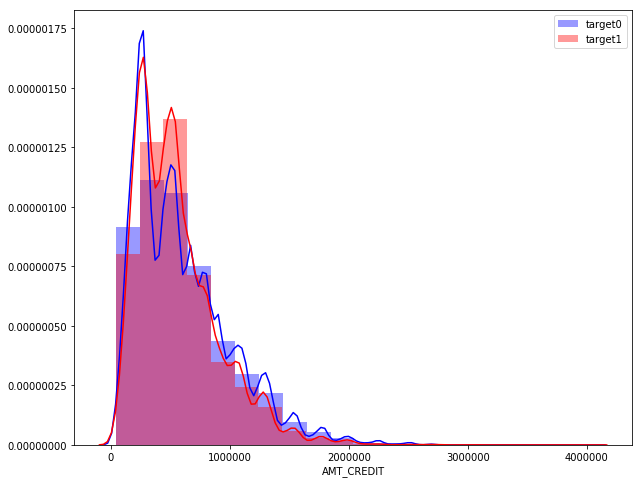

In [89]:
# 目的変数と借金の分布
plot_hist(data=credit_data2, target_column="AMT_CREDIT")

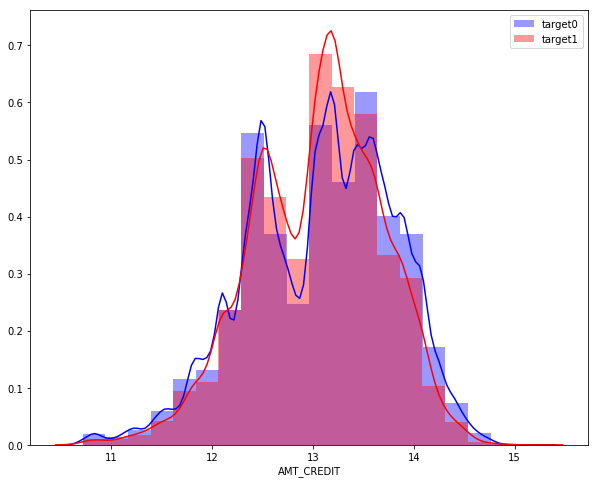

In [90]:
# 対数変換
plot_hist_log(data=credit_data2, target_column="AMT_CREDIT")

### 考察：借金についても、target0と１の明確な差は見られなかった。対数変換すると、２つの山のうち、右側の山がややtarget1の方が大きかった。


## 仮説３：収入に対する借金の比率は、返済能力によって異なるのではないか？<br>

### 検証：散布図で収入×借金のターゲット別分布を比較してみる

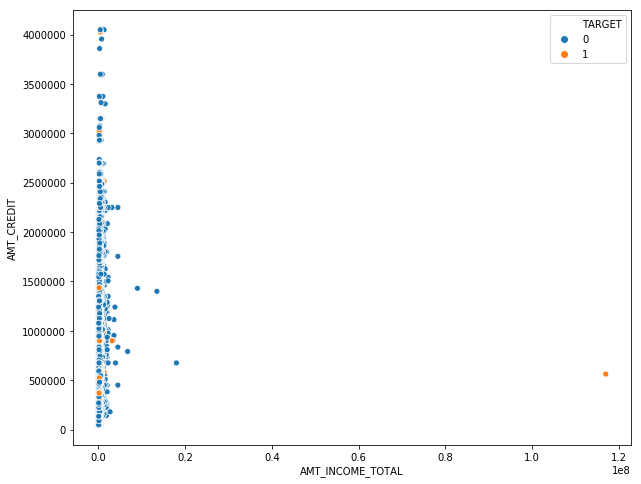

In [91]:
# x軸を収入、y軸を借金として、ターゲットで色分けして散布図を描画

plt.figure(figsize=(10, 8))
sns.scatterplot(x="AMT_INCOME_TOTAL",
                y="AMT_CREDIT", hue="TARGET", data=credit_data2) 



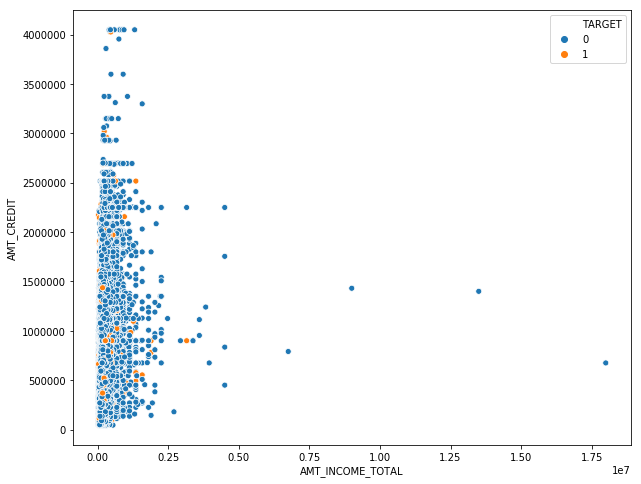

In [92]:
#収入の外れ値があったので、除去
credit_data3 = credit_data2[credit_data2["AMT_INCOME_TOTAL"] < 1.170000e+08]
#credit_data3.info(4) # サンプル数を表示し、除去できているか確認

# 外れ値を除去したデータで散布図を描画
plt.figure(figsize=(10, 8))
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT",
                hue="TARGET", data=credit_data3) 


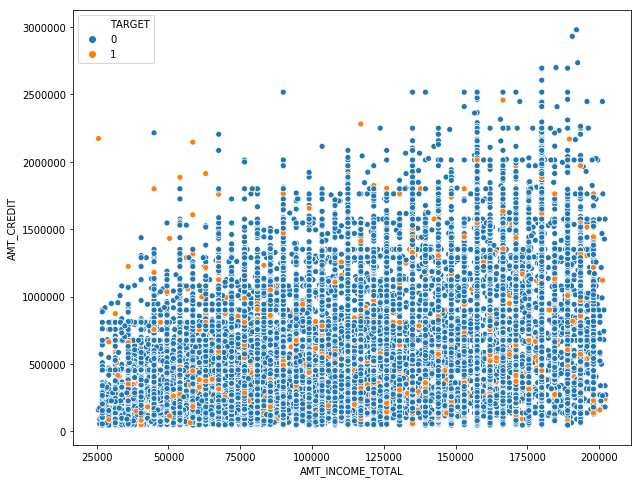

In [93]:
#　まだグラフが偏っているため、収入の７５％以上を除去
credit_data4 = credit_data3[credit_data3["AMT_INCOME_TOTAL"] < 2.025000e+05]
#credit_data4.info()

# 外れ値を除去したデータで散布図を描画
plt.figure(figsize=(10, 8))
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT",
                hue="TARGET", data=credit_data4) 

### 考察：返済困難者（target1)ほど、収入が少なく借金が多い左上に分布が偏ると予測していたが、満遍なく分布しているように見えた。

## 仮説４：携帯電話の有無は、返済能力の有無を判断できるのでは？<br>

In [94]:
no_mobail = credit_data2[credit_data2["FLAG_MOBIL"].isin(["0"])]
no_mobail

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,...,0,0,0,0,0,0,1,0,0,0


#### 考察：「モバイルを持っていない」と答えたサンプルが１しかなかったため、検証なし

## 仮説５：子供の人数と収入が返済能力に影響するのではないか？

### 検証：散布図、ヒストグラムでターゲット別に子どもの人数×収入の分布を確認

<Figure size 720x576 with 0 Axes>

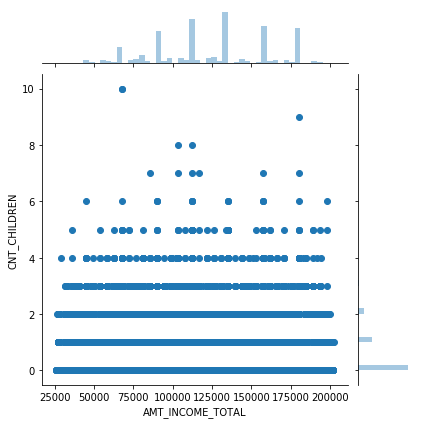

In [95]:
# 目的変数と子供の人数の相関
#　子供の人数を１０人以下に
credit_data5 = credit_data4[credit_data4["CNT_CHILDREN"] < 11]
#credit_data4.info()

# 散布図を描画
plt.figure(figsize=(10, 8))
sns.jointplot("AMT_INCOME_TOTAL", "CNT_CHILDREN",
                data=credit_data5) 


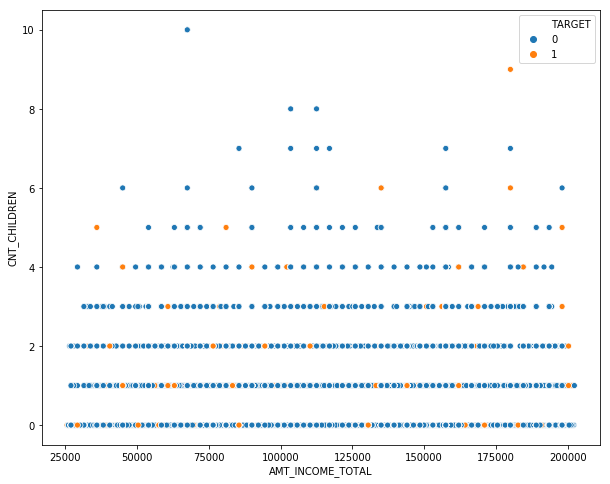

In [96]:
# 目的変数と子供の人数の相関
#　子供の人数を１０人以下に
credit_data5 = credit_data4[credit_data4["CNT_CHILDREN"] < 11]
#credit_data4.info()

# 収入の外れ値を除去したデータ（credit_data4)で散布図を描画
plt.figure(figsize=(10, 8))
sns.scatterplot(x="AMT_INCOME_TOTAL", y="CNT_CHILDREN",
                hue="TARGET", data=credit_data5) 


### 考察：支払い困難者（target1)は、子どもの人数が多く収入が低い、左上に偏ると予測していたが、満遍なく分布しているようだった。

## 仮説６：支払い困難者が居住するエリアは評価の低いエリアに集中するのでは？

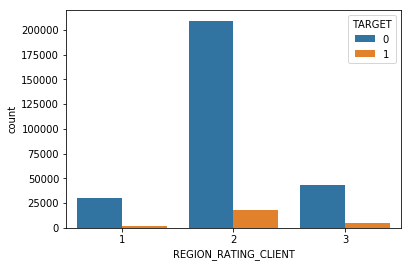

In [97]:
#　target０、１の居住エリア別の棒グラフ

sns.countplot(x="REGION_RATING_CLIENT", hue="TARGET", data=credit_data2)
plt.show()


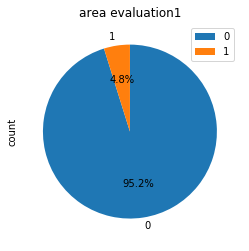

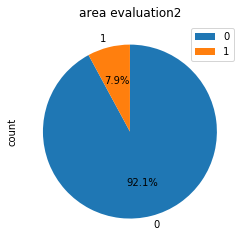

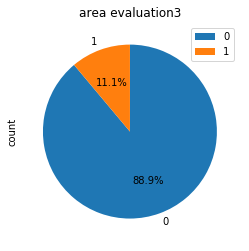

In [98]:
# ターゲットの存在比率で見てみる
#　居住地評価別のtarget0,1の存在比率円グラフ
a1 = credit_data2.query("REGION_RATING_CLIENT == 1")
a2 = credit_data2.query("REGION_RATING_CLIENT == 2")
a3 = credit_data2.query("REGION_RATING_CLIENT == 3")

def plot_pie(data, columns, titleword):
    count_name = data[columns].value_counts(sort=False)
    count_name = pd.DataFrame(count_name)
    count_name.columns = ["count"] # column名を指定
    count_name

    count_name.plot(kind='pie', y=count_name.columns[0],
                     counterclock=False, startangle=90, title = titleword,
                      autopct="%1.1f%%")

plot_pie(a1, "TARGET", "area evaluation1")
plot_pie(a2, "TARGET", "area evaluation2")
plot_pie(a3, "TARGET", "area evaluation3")

### 考察：支払い困難者（target1)の存在比率は、評価の低い居住エリアほど増加した。（評価１＞２＞３であるとして）

## 仮説７：職種を答えていない人（欠損）は、返済能力が低いのではないか？

### 検証：職種を尋ねるNAME_INCOME_TYPE 列の欠損値のデータと、目的変数との相関を調べる

In [103]:
# NAME_INCOME_TYPE の欠損値の有無を確認

nan_credit_data.index # 欠損値ありのリストのINDEXを表示


Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

### 考察：欠損値がある列のリスト（column数：６７）に、NAME_INCOME_TYPE は入っておらず、欠損値はなかった。

### 【問題5】（アドバンス課題）カーネルへの投稿